In [1]:
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
import torch

In [3]:
def summary_test(file_path):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(8)]
    tmp = np.array(history[0]["test_loss"])
    tmp2 = np.array(history[0]["test_acc"])
    for j in range(1, 8):
        tmp += np.array(history[j]["test_loss"])
        tmp2 += np.array(history[j]["test_acc"])
    
    test_loss = tmp/8
    test_acc = tmp2/8
    
    return test_loss, test_acc

def summary_val(file_path):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(8)]
    tmp = np.array(history[0]["val_loss"])
    tmp2 = np.array(history[0]["val_acc"])
    for j in range(1, 8):
        tmp += np.array(history[j]["val_loss"])
        tmp2 += np.array(history[j]["val_acc"])
    
    test_loss = tmp/8
    test_acc = tmp2/8
    
    return test_loss, test_acc

def summary_train(file_path):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(8)]
    tmp = np.array(history[0]["train_loss"])
    tmp2 = np.array(history[0]["train_acc"])
    for j in range(1, 8):
        tmp += np.array(history[j]["train_loss"])
        tmp2 += np.array(history[j]["train_acc"])
    
    test_loss = tmp/8
    test_acc = tmp2/8
    
    return test_loss, test_acc

In [4]:
def search_best_lr(path, lr_list):
    
    best_acc = -1
    best_lr = -1
    
    for lr in lr_list:
        _, acc = summary_val(path + "/lr_" + str(lr))
            
        #print(method, lr, acc[-1])
        if best_acc < acc[-1]:
            best_acc = acc[-1]
            best_lr = lr
    return best_lr

def average_acc(acc_list):
    avg = []
    std = []
    for i in range(len(acc_list[0])):
        avg.append(np.average([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        std.append(np.std([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        
    return avg, std

# CIFAR-10

one_peer_exp 0.1 88.11083333333333 0.36734596167041084
one_peer_deco 0.1 88.42166666666667 0.13620348339484692


Text(0.5, 1.0, 'alpha=10.0')

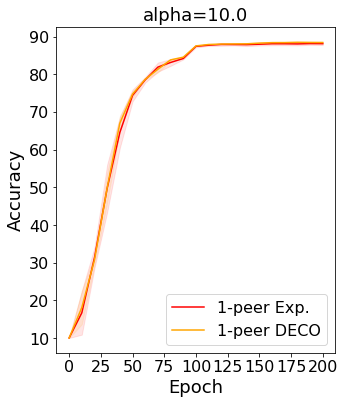

In [5]:
alpha = 10.0
colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["one_peer_exp", "one_peer_deco"]
labels = ["1-peer Exp.", "1-peer DECO"]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        #lr = search_best_lr(f"../results/cifar_vgg/{seed}/alpha_{alpha}/{graph}", [0.1])
        lr = 0.1
        loss, acc = summary_test(f"../results/cifar_vgg/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9")
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)


one_peer_exp 0.1 87.33333333333333 0.21568044778225964
one_peer_deco 0.1 87.52083333333333 0.15686158087802737


Text(0.5, 1.0, 'alpha=1.0')

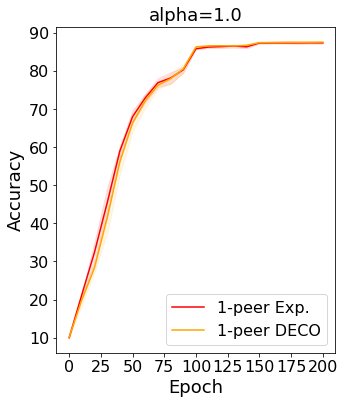

In [10]:
alpha = 1.0
colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["one_peer_exp", "one_peer_deco"]
labels = ["1-peer Exp.", "1-peer DECO"]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        #lr = search_best_lr(f"../results/cifar_vgg/{seed}/alpha_{alpha}/{graph}", [0.1])
        lr = 0.1
        loss, acc = summary_test(f"../results/cifar_vgg/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9")
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"alpha={alpha}", fontsize=18)
